# 1. Librerías necesarias

In [178]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from imblearn.over_sampling import SMOTE
from sklearn.metrics import precision_score
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn import naive_bayes
import random
from math import sin 
from time import time


# 2. Preparación de los datos para el modelado

En este paso importaremos el DataSet sintético para comenzar a trabajar con el.

In [179]:
df = pd.read_csv("../TFM_job/dataset_alzheimer_danielRozp.csv", ",")
#df = df.drop(columns="Unnamed: 0")
df["alzheimer"] = df["alzheimer"].apply(lambda x : 1 if x == "Si" else 0)
df.head()

,id_sujeto,genero,intervalo_edad,edad,estado_civil,numero_descendientes,actividad_fisica,calidad_sueño,calidad_dieta,fumador,...,idioma_nativo,vegetariano,vegano,lesiones_cabeza,tipo_adiccion,sobrepeso,obesidad,nivel_educativo,empleo_realizado,alzheimer
0,271,Masculino,>85,89,viudo,1,sedentaria,baja,mind0-7,fumador_empedernido,...,Japones,No,No,Si,Ninguna,Si,No,bajo,investigacion,1
1,45,Femenino,80-84,82,casado,>5,sedentaria,trastornos_sueño,mind0-7,fumador_empedernido,...,Inglés,Si,No,No,Ninguna,Si,No,bajo-medio,manual,1
2,17,Femenino,>85,92,divorciado,0,sedentaria,trastornos_sueño,mind9-15,no_fumador,...,Inglés,Si,No,Si,Ninguna,Si,No,alto-medio,intelectual,1
3,366,Masculino,50-64,50,casado,1,moderada,media,mind7-9,fumador_activo,...,Chino,No,No,Si,Ninguna,Si,No,medio,mecanico,1
4,313,Femenino,>85,99,soltero,>5,moderada,media,mind7-9,fumador_empedernido,...,Japones,Si,No,Si,Ninguna,No,Si,bajo-medio,manual,1


Una vez importados los datos crearemos variables dummies debido a la alta carga de variables categóricas que tiene nuestro DataSet. Dividiendo a continuación los datos en variables predictoras X y variable target y.

In [180]:
df_num = df[["id_sujeto","alzheimer","edad", "edad_jubilacion"]]
df_cat = df.drop(columns=df_num.columns)
df_test = df_cat
df_dummies = pd.get_dummies(df_test, columns=df_test.columns)
df_result = pd.concat([df_dummies, df_num], axis=1, sort=False).drop(columns="id_sujeto")
X = df_result.drop(columns="alzheimer")
y = df_result["alzheimer"]

Finalmente dividiremos las variables en conjunto de entrenamiento y conjunto test para comprobar la veracidad de nuestro modelo.

In [181]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# 3. Modelado

En este punto se buscará el modelo con hiperparametros óptimos que mejores resultados nos devuelva.

### 3.1. Random Forest Classifier

In [182]:
clf = RandomForestClassifier(random_state=0, n_estimators=3, criterion = "entropy", max_depth = 40)

clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print('Precisión:', accuracy_score(y_test, y_pred))
print('Exactitud:', precision_score(y_test, y_pred))
print('Recall:', recall_score(y_test, y_pred))
print("Matriz de confusión" ,'\n',  confusion_matrix(y_test, y_pred))
report = classification_report(y_test, y_pred)
print(report)

Precisión: 0.99588
Exactitud: 0.6785714285714286
Recall: 0.42857142857142855
Matriz de confusión 
 [[24840    27]
 [   76    57]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     24867
           1       0.68      0.43      0.53       133

    accuracy                           1.00     25000
   macro avg       0.84      0.71      0.76     25000
weighted avg       1.00      1.00      1.00     25000



### 3.2. Logistic Regression

In [183]:
lr = LogisticRegression(random_state=0, penalty = "none", fit_intercept = False)

lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

print('Precisión:', accuracy_score(y_test, y_pred))
print('Exactitud:', precision_score(y_test, y_pred))
print('Recall:', recall_score(y_test, y_pred))
print("Matriz de confusión" ,'\n',  confusion_matrix(y_test, y_pred))
report = classification_report(y_test, y_pred)
print(report)

Precisión: 0.99684
Exactitud: 0.813953488372093
Recall: 0.5263157894736842
Matriz de confusión 
 [[24851    16]
 [   63    70]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     24867
           1       0.81      0.53      0.64       133

    accuracy                           1.00     25000
   macro avg       0.91      0.76      0.82     25000
weighted avg       1.00      1.00      1.00     25000



/home/daniel/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



### 3.3. Decision Tree Classifier

In [184]:
dt_classifier = DecisionTreeClassifier(random_state = 0, criterion = "gini", splitter = "best", max_depth = 4)
dt_classifier.fit(X_train, y_train)
y_pred = dt_classifier.predict(X_test)

print('Precisión:', accuracy_score(y_test, y_pred))
print('Exactitud:', precision_score(y_test, y_pred))
print('Recall:', recall_score(y_test, y_pred))
print("Matriz de confusión" ,'\n',  confusion_matrix(y_test, y_pred))
report = classification_report(y_test, y_pred)
print(report)

Precisión: 0.997
Exactitud: 0.7636363636363637
Recall: 0.631578947368421
Matriz de confusión 
 [[24841    26]
 [   49    84]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     24867
           1       0.76      0.63      0.69       133

    accuracy                           1.00     25000
   macro avg       0.88      0.82      0.84     25000
weighted avg       1.00      1.00      1.00     25000



### 3.4. Support Vector Machine

In [8]:
svm_classifier = svm.SVC(random_state = 0, kernel='linear', C = 4, gamma = "auto")
svm_classifier.fit(X_train, y_train)
y_pred = svm_classifier.predict(X_test)

print('Precisión:', accuracy_score(y_test, y_pred))
print('Exactitud:', precision_score(y_test, y_pred))
print('Recall:', recall_score(y_test, y_pred))
print("Matriz de confusión" ,'\n',  confusion_matrix(y_test, y_pred))
report = classification_report(y_test, y_pred)
print(report)

Precisión: 0.99708
Exactitud: 0.8061224489795918
Recall: 0.5939849624060151
Matriz de confusión 
 [[24848    19]
 [   54    79]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     24867
           1       0.81      0.59      0.68       133

    accuracy                           1.00     25000
   macro avg       0.90      0.80      0.84     25000
weighted avg       1.00      1.00      1.00     25000



### 3.5. Naive Bayes Classifier

In [9]:
nb_classifier = naive_bayes.GaussianNB()
nb_classifier.fit(X_train, y_train)
y_pred = nb_classifier.predict(X_test)

print('Precisión:', accuracy_score(y_test, y_pred))
print('Exactitud:', precision_score(y_test, y_pred))
print('Recall:', recall_score(y_test, y_pred))
print("Matriz de confusión" ,'\n',  confusion_matrix(y_test, y_pred))
report = classification_report(y_test, y_pred)
print(report)

Precisión: 0.95736
Exactitud: 0.09680207433016422
Recall: 0.8421052631578947
Matriz de confusión 
 [[23822  1045]
 [   21   112]]
              precision    recall  f1-score   support

           0       1.00      0.96      0.98     24867
           1       0.10      0.84      0.17       133

    accuracy                           0.96     25000
   macro avg       0.55      0.90      0.58     25000
weighted avg       0.99      0.96      0.97     25000



### 3.6. Selección del modelo

Como ambos algoritmos han funcionado aceptablemente, se seleccionará el algoritmo a utilizar en base a los tiempos de ejecución.

#### 3.6.1. Tiempos de carga

In [207]:
tiempo_inicial_DT = time() 
 
dt_classifier = DecisionTreeClassifier(random_state = 0, criterion = "gini", splitter = "best", max_depth = 4)
dt_classifier.fit(X_train, y_train)
y_pred = dt_classifier.predict(X_test)
 
tiempo_final_DT = time() 
 
tiempo_ejecucion_DT = tiempo_final_DT - tiempo_inicial_DT
 
tiempo_inicial_SVM = time() 
 
svm_classifier = svm.SVC(random_state = 0, kernel='linear', C = 4, gamma = "auto")
svm_classifier.fit(X_train, y_train)
y_pred = svm_classifier.predict(X_test)

tiempo_final_SVM = time() 
 
tiempo_ejecucion_SVM = tiempo_final_SVM - tiempo_inicial_SVM

El tiempo de ejecucion de Decission Tree Classifier fue: 1.1556756496429443
El tiempo de ejecucion de Support Vector Machine fue: 588.768637418747


In [211]:
print('El tiempo de ejecucion de Decission Tree Classifier fue:',round(tiempo_ejecucion_DT,2)," segundos")
print('El tiempo de ejecucion de Support Vector Machine fue:',round(tiempo_ejecucion_SVM,2)," segundos")

El tiempo de ejecucion de Decission Tree Classifier fue: 1.16  segundos
El tiempo de ejecucion de Support Vector Machine fue: 588.77  segundos


Como se puede observar el tiempo de carga del algoritmo Decission Tree Classifier es notablemente más bajo por lo que será el algoritmo seleccionado.

# 4. Balanceo de Datos - SMOTE

Una vez que hemos seleccionado el modelo que vamos a utilizar (Decision Tree Classifier) vamos a proceder al balanceo de datos debido a que claramente los datos no estan balanceados.

In [185]:
df_result["alzheimer"].value_counts()

0    99456
1      544
Name: alzheimer, dtype: int64

In [186]:
print(df_result.shape[0], " filas")

100000  filas


Vemos como actualmente solo el 0,54% de los registros son usuarios con Alzheimer. Actualmente contamos con 100.000 registros.

Por ello se comienza a aplicar la técnica de SMOTE

In [187]:
method = SMOTE()
X_resampled, y_resampled = method.fit_sample(X, y)
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.25, random_state=42)

In [188]:
from sklearn.tree import DecisionTreeClassifier

dt_classifier = DecisionTreeClassifier(random_state = 0, criterion = "gini", splitter = "best", max_depth = 4)
dt_classifier.fit(X_train, y_train)
y_pred = dt_classifier.predict(X_test)

print('Precisión:', accuracy_score(y_test, y_pred))
print('Exactitud:', precision_score(y_test, y_pred))
print('Recall:', recall_score(y_test, y_pred))
print("Matriz de confusión" ,'\n',  confusion_matrix(y_test, y_pred))
report = classification_report(y_test, y_pred)
print(report)

Precisión: 0.9713038931788932
Exactitud: 0.9938968313686146
Recall: 0.9488765614399169
Matriz de confusión 
 [[24525   146]
 [ 1281 23776]]
              precision    recall  f1-score   support

           0       0.95      0.99      0.97     24671
           1       0.99      0.95      0.97     25057

    accuracy                           0.97     49728
   macro avg       0.97      0.97      0.97     49728
weighted avg       0.97      0.97      0.97     49728



Se observa como la aplicación de SMOTE ha mejorado notablemente las métricas y la capacidad predictiva.

In [190]:
y_resampled.value_counts()

1    99456
0    99456
Name: alzheimer, dtype: int64

In [192]:
print(X_resampled.shape[0], " filas")

198912  filas


# 5. Variables más importantes del modelo

A continuación vamos a aplicar varias funciones para comprobar la importancia de las variables en el modelo.

### 5.1 Aplicación de feature_selection al modelo Decission Tree Classifier

In [212]:
col_sorted_by_importance=dt_classifier.feature_importances_.argsort()
feat_imp=pd.DataFrame({
    'cols':X.columns[col_sorted_by_importance],
    'imps':dt_classifier.feature_importances_[col_sorted_by_importance]
})

import plotly_express as px
px.bar(feat_imp.sort_values(by="imps", ascending=False).sort_values(by="imps", ascending=False).iloc[0:25]
       , x='cols', y='imps')


Usemos la técnica de permutación para ver mejor la importancia de cada variable

### 5.2 Aplicación de la permutación de la selección de variables

In [217]:
def PermImportance(X, y, clf, metric, num_iterations=100):
    baseline_metric=metric(y, clf.predict(X))
    scores={c:[] for c in X.columns}
    for c in X.columns:
        X1=X.copy(deep=True)
        for _ in range(num_iterations):
            temp=X1[c].tolist()
            random.shuffle(temp)
            X1[c]=temp
            score=metric(y, clf.predict(X1))
            scores[c].append(baseline_metric-score)
    return baseline_metric, scores

In [218]:
baseline, scores=PermImportance(X_test, y_test, dt_classifier, recall_score, num_iterations=10)

In [219]:
percent_changes={c:[] for c in X.columns}
for c in scores:
    for i in range(len(scores[c])):
        percent_changes[c].append(scores[c][i]/baseline*100)

px.bar(
    pd.DataFrame.from_dict(percent_changes).melt().groupby(['variable']).mean().reset_index().sort_values(['value'], ascending=False)[:25], 
    x='variable', 
    y='value', 
    labels={
        'variable':'column', 
        'value':'% change in recall'
        }
       )

In [221]:
px.bar(
    pd.DataFrame.from_dict(percent_changes).melt().groupby(['variable']).mean().reset_index().sort_values(['value'], ascending=False)[:25], 
    x='variable', 
    y='value', 
    labels={
        'variable':'columnas', 
        'value':'% cambio en recall'
        }
       )

# 6. Predicción con el modelo

Una vez que el modelo está entrenado y se ha comprobado la fiabilidad del mismo, se procederá a realizar una predicción con datos sintéticos creados por nuestro sistema.

### 6.1 Creación del DataSet Sintético

Se crean 100 registros

In [153]:
#identificador
id_sujeto = np.random.randint(150000,150100, size=(1000))
df_pacientes = pd.DataFrame(id_sujeto, columns=['id_sujeto'])

#genero
genero = ["Masculino","Femenino"]
df_pacientes["genero"] = np.random.choice(genero, 1000, p=[0.5, 0.5])

#edad
edad = ["50-64","65-69","70-74", "75-79","80-84",">85"]
df_pacientes["intervalo_edad"] = np.random.choice(edad, 1000, p=[0.16, 0.16,0.16,0.16,0.16,0.2])

def conditional_categories_edad(row):
    if row['intervalo_edad'] == "50-64" :
        return np.random.randint(50,64)
    if row['intervalo_edad'] == "65-69":
        return np.random.randint(65,69)
    if row['intervalo_edad'] == "70-74":
        return np.random.randint(70,74)
    if row['intervalo_edad'] == "75-79":
        return np.random.randint(75,79)
    if row['intervalo_edad'] == "80-84":
        return np.random.randint(80,84)
    if row['intervalo_edad'] == ">85" :
        return np.random.randint(85,100)
df_pacientes['edad']=df_pacientes.apply(conditional_categories_edad, axis=1)

#estado civil
estado_civil = ["soltero","casado","divorciado", "viudo"]
df_pacientes["estado_civil"] = np.random.choice(estado_civil, 1000, p=[0.25, 0.25,0.25,0.25])

#numero_descendencia
numero_descendientes = ["0","1","2","3","4","5",">5"]
df_pacientes["numero_descendientes"] = np.random.choice(numero_descendientes, 1000, p=[0.1428, 0.1428, 0.1428, 0.1428, 0.1428, 0.1428, 0.1432 ])

#actividad fisica 
actividad_fisica = ["sedentaria","ligera","moderada", "intensa","muy intensa"]
df_pacientes["actividad_fisica"] = np.random.choice(actividad_fisica, 1000, p=[0.2, 0.2, 0.2, 0.2, 0.2])

#calidad del sueño
calidad_sueño = ["trastornos_sueño","baja","media","buena"]
df_pacientes["calidad_sueño"] = np.random.choice(calidad_sueño, 1000, p=[0.25, 0.25, 0.25, 0.25])

#calidad de la dieta
calidad_dieta = ["mind0-7","mind7-9","mind9-15"]
df_pacientes["calidad_dieta"] = np.random.choice(calidad_dieta, 1000, p=[0.33, 0.33, 0.34])

#fumador
fumador = ["no_fumador", "fumador_pasivo", "fumador_ocasional", "fumador_medio", "fumador_activo", "fumador_empedernido"]
df_pacientes["fumador"] = np.random.choice(fumador, 1000, p=[0.16, 0.16, 0.16, 0.16, 0.16, 0.2])

#bebedor
bebedor = ["abstemio","bebedor_moderado","bebedor_riesgo"]
df_pacientes["bebedor"] = np.random.choice(bebedor, 1000, p=[0.33, 0.33, 0.34])

#niveles_depresión
niveles_depresión = ["no_depresion","depresion_leve","depresion_moderada","depresion_grave"]
df_pacientes["niveles_depresión"] = np.random.choice(niveles_depresión, 1000, p=[0.25, 0.25, 0.25, 0.25])

#niveles_ansiedad
niveles_ansiedad = ["no_ansiedad","ansiedad_leve","ansiedad_moderada","ansiedad_alta"]
df_pacientes["niveles_ansiedad"] = np.random.choice(niveles_ansiedad, 1000, p=[0.25, 0.25, 0.25, 0.25])

#niveles_estres
niveles_estres = ["estres_bajo", "estres_medio", "estres_alto"]
df_pacientes["niveles_estres"] = np.random.choice(niveles_estres, 1000, p=[0.33, 0.33, 0.34])

#actividad_mental_ultimos_años
actividad_mental_ultimos_años = ["Si","No"]
df_pacientes["actividad_mental_ultimos_años"] = np.random.choice(actividad_mental_ultimos_años, 1000, p=[0.5,0.5])

#actividad_fisica_ultimos_años
df_pacientes["actividad_fisica_ultimos_años"] = np.random.choice(actividad_fisica, 1000, p=[0.2, 0.2, 0.2, 0.2, 0.2])

#numero_idiomas
numero_idiomas = ["1","2",">=3"]
df_pacientes["numero_idiomas"] = np.random.choice(numero_idiomas, 1000, p=[0.33, 0.33, 0.34])

#niveles_vitamina_b12
niveles_vitamina_b12 = ["bajos","normales","altos"]
df_pacientes["niveles_vitamina_b12"] = np.random.choice(niveles_vitamina_b12, 1000, p=[0.33, 0.33, 0.34])

#antecedentes_familiares_1Grado
antecedentes_familiares_1Grado = ["Si","No"]
df_pacientes["antecedentes_familiares_1Grado"] = np.random.choice(antecedentes_familiares_1Grado, 1000, p=[0.5,0.5])

#antecedentes_familiares_2Grado
antecedentes_familiares_2Grado = ["Si","No"]
df_pacientes["antecedentes_familiares_2Grado"] = np.random.choice(antecedentes_familiares_2Grado, 1000, p=[0.5,0.5])

#antecedentes_familiares_3Grado
antecedentes_familiares_3Grado = ["Si","No"]
df_pacientes["antecedentes_familiares_3Grado"] = np.random.choice(antecedentes_familiares_3Grado, 1000, p=[0.5,0.5])

#genetica
genetica = ["Si","No"]
df_pacientes["genetica"] = np.random.choice(genetica, 1000, p=[0.5,0.5])

#deportes_realizados
deportes_realizados = ["deportes_equipo","deportes_individuales","deportes_fuerza","deportes_extremos","deportes_contacto"]
df_pacientes["deportes_realizados"] = np.random.choice(deportes_realizados, 1000, p=[0.2, 0.2, 0.2, 0.2, 0.2])

#cardiopatias
cardiopatias = ["Si","No"]
df_pacientes["cardiopatias"] = np.random.choice(cardiopatias, 1000, p=[0.5,0.5])

#diabetes
diabetes = ["Si","No"]
df_pacientes["diabetes"] = np.random.choice(diabetes, 1000, p=[0.5,0.5])

#hipertension
hipertension = ["Si","No"]
df_pacientes["hipertension"] = np.random.choice(hipertension, 1000, p=[0.5,0.5])

#colesterol
colesterol = ["Adecuado","No_Adecuado"]
df_pacientes["colesterol"] = np.random.choice(colesterol, 1000, p=[0.5,0.5])

#actividad_creativa
actividad_creativa = ["pintura", "escritura", "musica", "escultura", "otras", "ninguna"]
df_pacientes["actividad_creativa"] = np.random.choice(actividad_creativa, 1000, p=[0.16, 0.16,0.16,0.16,0.16,0.2])

#mano_dominante
mano_dominante = ["diestro","zurdo","ambidiestro"]
df_pacientes["mano_dominante"] = np.random.choice(mano_dominante, 1000, p=[0.33, 0.33, 0.34])

#edad_jubilacon
def conditional_categories_edad_jubilacion(row):
    if row['intervalo_edad'] == "50-64" :
        return np.random.randint(50,64)
    if row['intervalo_edad'] == "65-69":
        return np.random.randint(65,69)
    if row['intervalo_edad'] == "70-74":
        return np.random.randint(70,74)
    if row['intervalo_edad'] == "75-79":
        return np.random.randint(75,79)
    if row['intervalo_edad'] == "80-84":
        return np.random.randint(80,84)
    if row['intervalo_edad'] == ">85" :
        return np.random.randint(85,100)
df_pacientes['edad_jubilacion']=df_pacientes.apply(conditional_categories_edad_jubilacion, axis=1)


#socialmente_activo
socialmente_activo = ["Si","No"]
df_pacientes["socialmente_activo"] = np.random.choice(socialmente_activo, 1000, p=[0.5, 0.5])

#soledad
soledad = ["Si","No"]
df_pacientes["soledad"] = np.random.choice(soledad, 1000, p=[0.5, 0.5])

#nacionalidad
nacionalidad = ["Espana","Polonia","Rumania","Venezuela","Colombia","Ecuador","Inglaterra","China","Japon","Francia"]
df_pacientes["nacionalidad"] = np.random.choice(nacionalidad, 1000, p=[0.1 ,0.1 ,0.1 ,0.1 ,0.1 ,0.1 ,0.1 ,0.1 ,0.1 ,0.1 ])

#continente
def conditional_categories_continente(row):
    if row['nacionalidad'] == "Espana" :
        return 'Europa'
    if row['nacionalidad'] == "Polonia":
        return 'Europa'
    if row['nacionalidad'] == "Rumania" :
        return 'Europa'
    if row['nacionalidad'] == "Venezuela" :
        return 'America del sur'
    if row['nacionalidad'] == "Colombia" :
        return 'America del sur'
    if row['nacionalidad'] == "Ecuador" :
        return 'America del sur'
    if row['nacionalidad'] == "Inglaterra" :
        return 'Europa'
    if row['nacionalidad'] == "China" :
        return 'Asia'
    if row['nacionalidad'] == "Japon" :
        return 'Asia'
    if row['nacionalidad'] == "Francia" :
        return 'Europa'

df_pacientes['continente']=df_pacientes.apply(conditional_categories_continente, axis=1)

#idioma_nativo
idioma_nativo = ["Espanol","Polaco","Rumano","Ingles","Chino","Japones","Frances"]
def conditional_categories_idioma_nativo(row):
    if row['nacionalidad'] == "Espana":
        return np.random.choice(["Español","Polaco","Rumano","Inglés", "Chino"], 
                                p=[0.7, 0.05, 0.15, 0.01, 0.09])
    if row['nacionalidad'] == "Venezuela":
        return np.random.choice(["Español","Inglés"], 
                                p=[0.8, 0.2])
    if row['nacionalidad'] == "Colombia":
        return np.random.choice(["Español","Inglés"], 
                                p=[0.8, 0.2])
    if row['nacionalidad'] == "Ecuador":
        return np.random.choice(["Español","Inglés"], 
                                p=[0.8, 0.2])
    if row['nacionalidad'] == "Inglaterra":
        return np.random.choice(["Español","Polaco","Rumano","Inglés","Chino","Japones",
                "Frances"], p=[0.075, 0.1, 0.05, 0.72, 0.029, 0.001, 0.025])  
    if row['nacionalidad'] == "Polonia":
        return np.random.choice(["Polaco","Español","Inglés"], 
                                p=[0.8, 0.1, 0.1])
    if row['nacionalidad'] == "Rumania":
        return np.random.choice(["Rumano","Español","Inglés"], 
                                p=[0.8, 0.1, 0.1])
    if row['nacionalidad'] == "China":
        return np.random.choice(["Chino","Español","Inglés", "Japones"], 
                                p=[0.7, 0.1, 0.1, 0.1])
    if row['nacionalidad'] == "Japon":
        return np.random.choice(["Japones","Chino","Inglés"], 
                                p=[0.8, 0.1, 0.1])
    if row['nacionalidad'] == "Francia":
        return np.random.choice(["Frances","Español","Inglés"], 
                                p=[0.8, 0.1, 0.1])
    
df_pacientes['idioma_nativo']=df_pacientes.apply(conditional_categories_idioma_nativo, axis=1)

#vegetariano
vegetariano = ["Si","No"]
df_pacientes["vegetariano"] = np.random.choice(hipertension, 1000, p=[0.5,0.5])

#vegano
vegano = ["Si","No"]
df_pacientes["vegano"] = np.random.choice(vegano, 1000, p=[0.5,0.5])

#lesiones_cabeza
lesiones_cabeza = ["Si","No"]
df_pacientes["lesiones_cabeza"] = np.random.choice(lesiones_cabeza, 1000, p=[0.5,0.5])

#tipo_adiccion
tipo_adiccion = ["Cocaina", "Marihuana", "Anfetaminas", "Benzodiacepinas", "Ninguna"]
df_pacientes["tipo_adiccion"] = np.random.choice(tipo_adiccion, 1000, p=[0.01,0.01, 0.01, 0.01, 0.96])

#sobrepeso
sobrepeso = ["Si","No"]
df_pacientes["sobrepeso"] = np.random.choice(sobrepeso, 1000, p=[0.5,0.5])

#obesidad
obesidad = ["Si","No"]
df_pacientes["obesidad"] = np.random.choice(obesidad, 1000, p=[0.5,0.5])

#nivel_educativo
nivel_educativo = ["bajo","bajo-medio","medio","alto-medio","alto"]
df_pacientes["nivel_educativo"] = np.random.choice(nivel_educativo, 1000, p=[0.2,0.2, 0.2, 0.2, 0.2])

#empleo_realizado
empleo_realizado = ["mecanico","manual","intelectual","investigacion"]
df_pacientes["empleo_realizado"] = np.random.choice(empleo_realizado, 1000, p=[0.25,0.25, 0.25, 0.25])

#alzheimer
alzheimer = ["Si","No"]
df_pacientes["alzheimer"] = np.random.choice(alzheimer, 1000, p=[0.5, 0.5])

In [154]:
df_pacientes.shape

(1000, 44)

### 6.2. Generación de predicciones

In [155]:
df_pacientes["alzheimer"] = df_pacientes["alzheimer"].apply(lambda x : 1 if x == "Si" else 0)
df_pacientes.head()

,id_sujeto,genero,intervalo_edad,edad,estado_civil,numero_descendientes,actividad_fisica,calidad_sueño,calidad_dieta,fumador,...,idioma_nativo,vegetariano,vegano,lesiones_cabeza,tipo_adiccion,sobrepeso,obesidad,nivel_educativo,empleo_realizado,alzheimer
0,150007,Femenino,>85,89,divorciado,5,moderada,baja,mind9-15,fumador_activo,...,Inglés,Si,No,Si,Ninguna,No,No,bajo,manual,1
1,150001,Masculino,80-84,81,casado,0,muy intensa,media,mind7-9,fumador_activo,...,Inglés,Si,Si,No,Ninguna,No,No,alto,investigacion,1
2,150075,Femenino,80-84,82,casado,4,moderada,media,mind7-9,fumador_ocasional,...,Español,No,No,Si,Ninguna,Si,No,alto,investigacion,1
3,150011,Femenino,50-64,53,casado,4,muy intensa,media,mind0-7,no_fumador,...,Polaco,Si,No,Si,Ninguna,No,Si,alto,investigacion,1
4,150035,Masculino,80-84,83,divorciado,3,sedentaria,baja,mind9-15,fumador_pasivo,...,Chino,No,Si,No,Ninguna,No,Si,medio,manual,0


In [156]:
df_num = df_pacientes[["id_sujeto","alzheimer","edad", "edad_jubilacion"]]
df_cat = df_pacientes.drop(columns=df_num.columns)
df_test = df_cat
df_dummies = pd.get_dummies(df_cat, columns=df_cat.columns)
df_result = pd.concat([df_dummies, df_num], axis=1, sort=False).drop(columns=["id_sujeto","alzheimer"])

In [157]:
new_input = df_result.iloc[560:580]

In [158]:
new_input.shape

(20, 144)

In [159]:
new_output = clf.predict(new_input)
new_output

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [160]:
DefaultProba = lr.predict_proba(new_input)
DefaultProba = DefaultProba[:,1]
DefaultProba

array([2.09896310e-01, 2.14091806e-01, 7.08352303e-04, 6.44886735e-03,
       1.11953923e-01, 1.16336170e-01, 4.76889177e-04, 3.52657517e-02,
       1.10877551e-02, 5.27147911e-01, 7.42079436e-01, 4.29020917e-01,
       3.86488394e-01, 1.23347772e-03, 4.17239599e-04, 5.32177472e-04,
       6.45038967e-04, 5.46390125e-03, 2.76774707e-02, 1.62002379e-02])

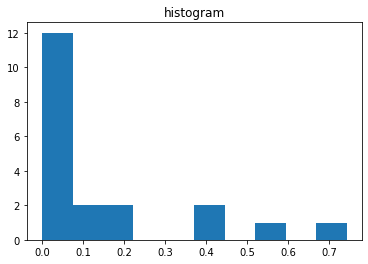

In [161]:
a = DefaultProba 
plt.hist(a) 
plt.title("histogram") 
plt.show()

In [162]:
df_full = df_pacientes.iloc[560:580].copy().drop(columns="alzheimer")
df_full.insert(0, 'Probabilidad de Alzheimer', DefaultProba)

In [163]:
df_full['Probabilidad de Alzheimer'] = df_full['Probabilidad de Alzheimer'].apply(lambda x: x*100)

In [164]:
df_full

,Probabilidad de Alzheimer,id_sujeto,genero,intervalo_edad,edad,estado_civil,numero_descendientes,actividad_fisica,calidad_sueño,calidad_dieta,...,continente,idioma_nativo,vegetariano,vegano,lesiones_cabeza,tipo_adiccion,sobrepeso,obesidad,nivel_educativo,empleo_realizado
560,20.989631,150010,Masculino,65-69,68,viudo,5,moderada,media,mind9-15,...,Europa,Español,Si,No,Si,Ninguna,Si,Si,alto-medio,manual
561,21.409181,150061,Masculino,>85,96,soltero,2,moderada,buena,mind9-15,...,Asia,Chino,No,Si,No,Ninguna,Si,Si,bajo,mecanico
562,0.070835,150056,Masculino,>85,99,viudo,3,moderada,baja,mind9-15,...,Asia,Japones,Si,No,No,Ninguna,No,No,medio,intelectual
563,0.644887,150054,Masculino,70-74,70,soltero,0,moderada,baja,mind0-7,...,America del sur,Español,No,No,Si,Ninguna,Si,No,alto,intelectual
564,11.195392,150094,Masculino,75-79,77,divorciado,5,ligera,media,mind0-7,...,Asia,Japones,Si,Si,Si,Anfetaminas,No,Si,medio,mecanico
565,11.633617,150065,Femenino,70-74,72,divorciado,2,ligera,baja,mind0-7,...,Europa,Rumano,Si,No,No,Ninguna,Si,No,bajo-medio,manual
566,0.047689,150041,Femenino,65-69,68,soltero,5,intensa,buena,mind9-15,...,Asia,Japones,Si,Si,Si,Ninguna,No,No,alto,manual
567,3.526575,150023,Femenino,65-69,67,casado,>5,ligera,buena,mind0-7,...,Asia,Japones,Si,Si,Si,Benzodiacepinas,Si,Si,bajo-medio,intelectual
568,1.108776,150061,Femenino,50-64,55,soltero,1,sedentaria,baja,mind0-7,...,Europa,Español,Si,Si,Si,Ninguna,Si,Si,bajo,intelectual
569,52.714791,150014,Femenino,80-84,83,divorciado,0,ligera,buena,mind7-9,...,Europa,Inglés,Si,No,Si,Ninguna,No,No,alto-medio,mecanico


Finalmente se obtendrá la probabilidad que tiene cada sujeto de desarrollar alzheimer junto con el identificador del paciente.